In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# 2.1 Load the Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
y_train_onehot = keras.utils.to_categorical(y_train, 10)
y_test_onehot = keras.utils.to_categorical(y_test, 10)
print(y_train.shape, y_train_onehot.shape)

(60000,) (60000, 10)


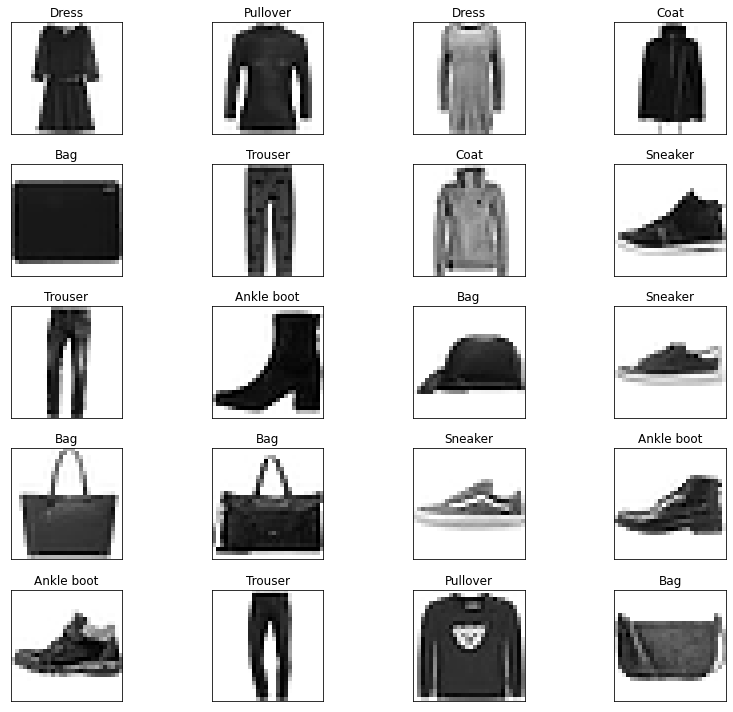

In [ ]:
cnt = 1
plt.figure(figsize=(12, 10))
for i in np.random.choice(range(len(x_train)), 20):
    plt.subplot(5, 4, cnt)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.title(class_names[y_train[i]])
    cnt += 1
plt.tight_layout()
plt.show()

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

# 2.2 Training on architectures

## Architecture 2

### With Adam

In [ ]:
# model = tf.keras.models.load_model('drive/MyDrive/model_arch2_2')

In [ ]:
model = keras.Sequential([
    keras.layers.Input((28, 28, 1)),
    keras.layers.Conv2D(64, (2, 2), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(.25),
    keras.layers.Conv2D(64, (2, 2), activation='relu'),
    keras.layers.Dropout(.25),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(.25),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 
                       tf.keras.metrics.Precision(), 
                       tf.keras.metrics.Recall()]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        16448     
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                        

In [ ]:
history = model.fit(x_train, y_train_onehot, epochs=50, validation_data=(x_test, y_test_onehot), batch_size=128)

Epoch 1/50
469/469 [==============================] - 16s 10ms/step - loss: 0.5816 - accuracy: 0.7927 - precision: 0.8583 - recall: 0.7294 - val_loss: 0.4133 - val_accuracy: 0.8465 - val_precision: 0.8837 - val_recall: 0.8139
Epoch 2/50
469/469 [==============================] - 5s 10ms/step - loss: 0.3866 - accuracy: 0.8607 - precision: 0.8915 - recall: 0.8304 - val_loss: 0.3323 - val_accuracy: 0.8793 - val_precision: 0.9055 - val_recall: 0.8591
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 0.3408 - accuracy: 0.8758 - precision: 0.9022 - recall: 0.8515 - val_loss: 0.2972 - val_accuracy: 0.8901 - val_precision: 0.9082 - val_recall: 0.8769
Epoch 4/50
469/469 [==============================] - 4s 8ms/step - loss: 0.3114 - accuracy: 0.8869 - precision: 0.9108 - recall: 0.8650 - val_loss: 0.2878 - val_accuracy: 0.8948 - val_precision: 0.9100 - val_recall: 0.8808
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.2870 - accuracy: 0.8946 -

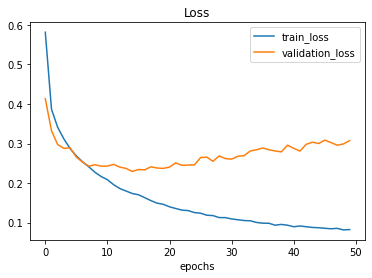

In [ ]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

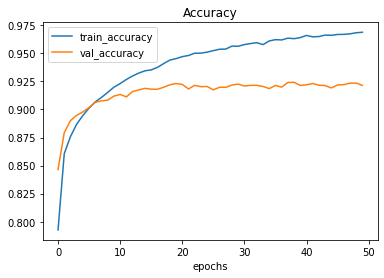

In [ ]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

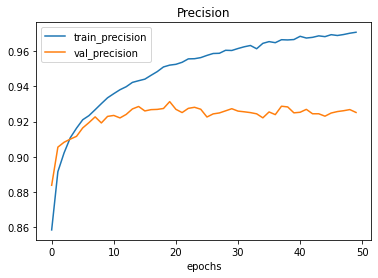

In [ ]:
plt.plot(history.history['precision'], label='train_precision')
plt.plot(history.history['val_precision'], label='val_precision')
plt.title('Precision')
plt.xlabel('epochs')
plt.legend()
plt.show()

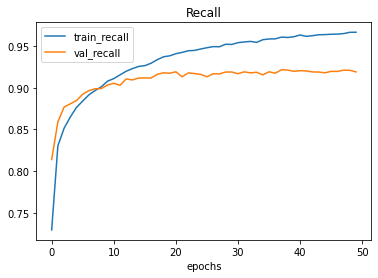

In [ ]:
plt.plot(history.history['recall'], label='train_recall')
plt.plot(history.history['val_recall'], label='val_recall')
plt.title('Recall')
plt.xlabel('epochs')
plt.legend()
plt.show()

313/313 [==============================] - 1s 2ms/step


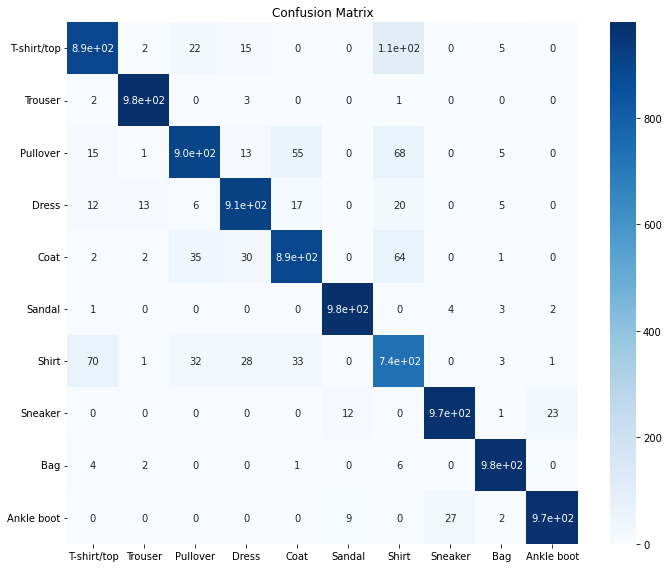

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
plt.figure(figsize=(10,8))
conf_mat = confusion_matrix(y_pred.tolist(), y_test.tolist())
sns.heatmap(conf_mat, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [ ]:
# model.save("drive/MyDrive/model_arch2_2")

In [ ]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.89      0.87      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.85      0.91      0.88      1000
       Dress       0.93      0.91      0.92      1000
        Coat       0.87      0.89      0.88      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.81      0.73      0.77      1000
     Sneaker       0.96      0.97      0.97      1000
         Bag       0.99      0.97      0.98      1000
  Ankle boot       0.96      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



### With SGD

In [ ]:
model = keras.Sequential([
    keras.layers.Input((28, 28, 1)),

    keras.layers.Conv2D(64, (2, 2), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(.25),

    keras.layers.Conv2D(64, (2, 2), activation='relu'),
    keras.layers.Dropout(.25),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(.25),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy', 
                       tf.keras.metrics.Precision(), 
                       tf.keras.metrics.Recall()]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        16448     
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                        

In [ ]:
history = model.fit(x_train, y_train_onehot, epochs=50, validation_data=(x_test, y_test_onehot), batch_size=128)

Epoch 1/50
469/469 [==============================] - 82s 170ms/step - loss: 1.2682 - accuracy: 0.5547 - precision_1: 0.7727 - recall_1: 0.3345 - val_loss: 0.7483 - val_accuracy: 0.7285 - val_precision_1: 0.8519 - val_recall_1: 0.5935
Epoch 2/50
469/469 [==============================] - 75s 161ms/step - loss: 0.7486 - accuracy: 0.7247 - precision_1: 0.8195 - recall_1: 0.6211 - val_loss: 0.6260 - val_accuracy: 0.7715 - val_precision_1: 0.8485 - val_recall_1: 0.6925
Epoch 3/50
469/469 [==============================] - 75s 160ms/step - loss: 0.6603 - accuracy: 0.7584 - precision_1: 0.8360 - recall_1: 0.6679 - val_loss: 0.5806 - val_accuracy: 0.7809 - val_precision_1: 0.8619 - val_recall_1: 0.7021
Epoch 4/50
469/469 [==============================] - 75s 159ms/step - loss: 0.6230 - accuracy: 0.7700 - precision_1: 0.8424 - recall_1: 0.6928 - val_loss: 0.5550 - val_accuracy: 0.7944 - val_precision_1: 0.8791 - val_recall_1: 0.7078
Epoch 5/50
469/469 [==============================] - 75s 15

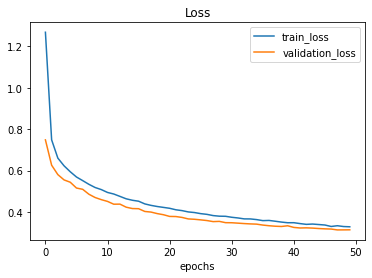

In [ ]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

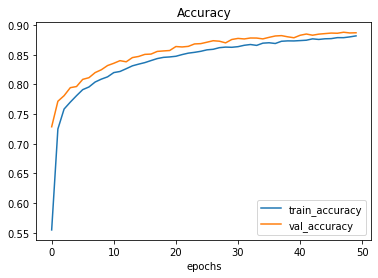

In [ ]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

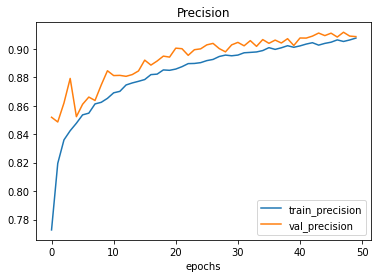

In [ ]:
plt.plot(history.history['precision_1'], label='train_precision')
plt.plot(history.history['val_precision_1'], label='val_precision')
plt.title('Precision')
plt.xlabel('epochs')
plt.legend()
plt.show()

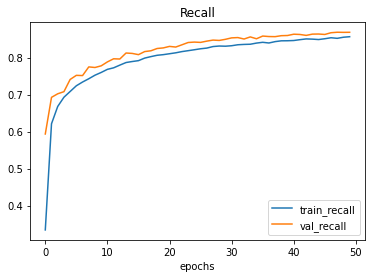

In [ ]:
plt.plot(history.history['recall_1'], label='train_recall')
plt.plot(history.history['val_recall_1'], label='val_recall')
plt.title('Recall')
plt.xlabel('epochs')
plt.legend()
plt.show()

313/313 [==============================] - 3s 11ms/step


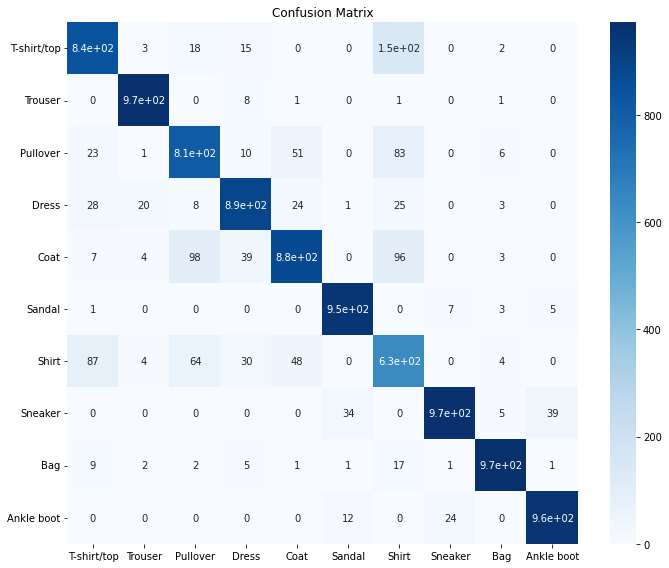

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
plt.figure(figsize=(10,8))
conf_mat = confusion_matrix(y_pred.tolist(), y_test.tolist())
sns.heatmap(conf_mat, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.84      0.83      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.82      0.81      0.82      1000
       Dress       0.89      0.89      0.89      1000
        Coat       0.78      0.88      0.82      1000
      Sandal       0.98      0.95      0.97      1000
       Shirt       0.73      0.63      0.68      1000
     Sneaker       0.93      0.97      0.95      1000
         Bag       0.96      0.97      0.97      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



## Architecture 4

### With RMSprop

In [ ]:
model = keras.Sequential([
    keras.layers.Input((28, 28, 1)),

    keras.layers.Conv2D(64, (2, 2), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(.25),

    keras.layers.Conv2D(64, (2, 2), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(.25),

    keras.layers.Conv2D(64, (2, 2), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(.25),

    keras.layers.Conv2D(64, (2, 2), activation='relu'),
    keras.layers.Dropout(.25),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(.25),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='RMSprop',
              loss='categorical_crossentropy',
              metrics=['accuracy', 
                       tf.keras.metrics.Precision(), 
                       tf.keras.metrics.Recall()]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 27, 27, 64)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 64)        16448     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 6, 6, 64)         

In [ ]:
history = model.fit(x_train, y_train_onehot, epochs=50, validation_data=(x_test, y_test_onehot), batch_size=128)

Epoch 1/50
469/469 [==============================] - 6s 10ms/step - loss: 1.0356 - accuracy: 0.6014 - precision_3: 0.7885 - recall_3: 0.4512 - val_loss: 0.6206 - val_accuracy: 0.7585 - val_precision_3: 0.8653 - val_recall_3: 0.6625
Epoch 2/50
469/469 [==============================] - 4s 9ms/step - loss: 0.6476 - accuracy: 0.7571 - precision_3: 0.8486 - recall_3: 0.6678 - val_loss: 0.5279 - val_accuracy: 0.8004 - val_precision_3: 0.8699 - val_recall_3: 0.7280
Epoch 3/50
469/469 [==============================] - 4s 9ms/step - loss: 0.5575 - accuracy: 0.7954 - precision_3: 0.8640 - recall_3: 0.7214 - val_loss: 0.4695 - val_accuracy: 0.8247 - val_precision_3: 0.8783 - val_recall_3: 0.7700
Epoch 4/50
469/469 [==============================] - 4s 9ms/step - loss: 0.5138 - accuracy: 0.8117 - precision_3: 0.8671 - recall_3: 0.7527 - val_loss: 0.4539 - val_accuracy: 0.8307 - val_precision_3: 0.8768 - val_recall_3: 0.7820
Epoch 5/50
469/469 [==============================] - 4s 9ms/step - los

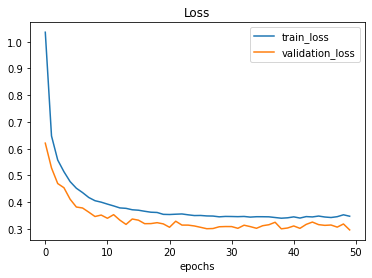

In [ ]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

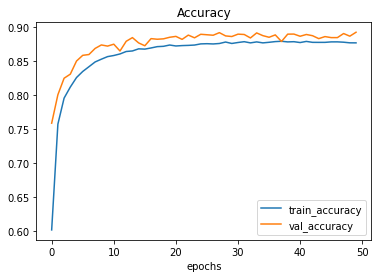

In [ ]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

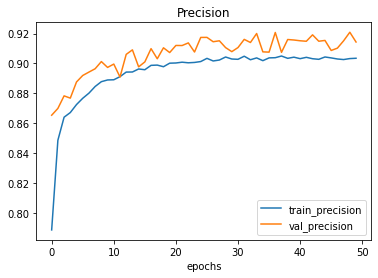

In [ ]:
plt.plot(history.history['precision_3'], label='train_precision')
plt.plot(history.history['val_precision_3'], label='val_precision')
plt.title('Precision')
plt.xlabel('epochs')
plt.legend()
plt.show()

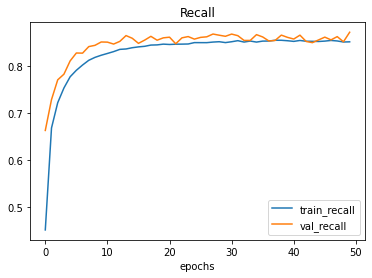

In [ ]:
plt.plot(history.history['recall_3'], label='train_recall')
plt.plot(history.history['val_recall_3'], label='val_recall')
plt.title('Recall')
plt.xlabel('epochs')
plt.legend()
plt.show()

313/313 [==============================] - 1s 3ms/step


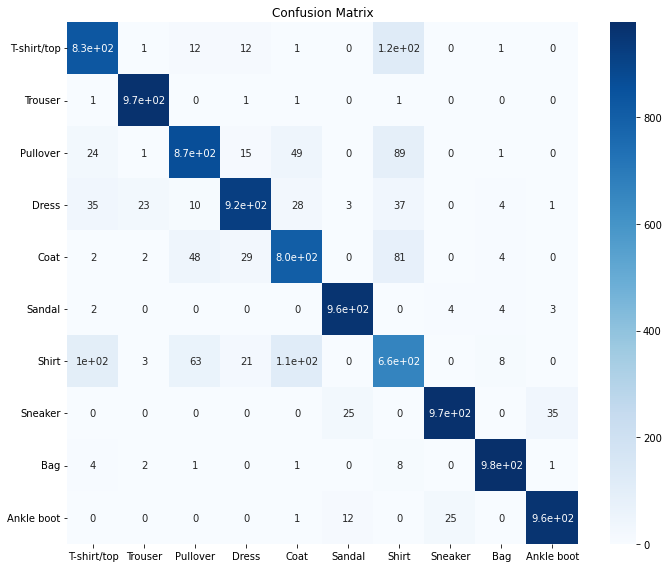

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
plt.figure(figsize=(10,8))
conf_mat = confusion_matrix(y_pred.tolist(), y_test.tolist())
sns.heatmap(conf_mat, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.83      0.84      1000
     Trouser       1.00      0.97      0.98      1000
    Pullover       0.83      0.87      0.85      1000
       Dress       0.87      0.92      0.89      1000
        Coat       0.83      0.81      0.82      1000
      Sandal       0.99      0.96      0.97      1000
       Shirt       0.68      0.66      0.67      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
model.save('drive/MyDrive/model_arch4')

### With SGD

In [ ]:
model = keras.Sequential([
    keras.layers.Input((28, 28, 1)),

    keras.layers.Conv2D(64, (2, 2), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(.25),

    keras.layers.Conv2D(64, (2, 2), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(.25),

    keras.layers.Conv2D(64, (2, 2), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(.25),

    keras.layers.Conv2D(64, (2, 2), activation='relu'),
    keras.layers.Dropout(.25),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(.25),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy', 
                       tf.keras.metrics.Precision(), 
                       tf.keras.metrics.Recall()]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 27, 27, 64)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        16448     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 6, 6, 64)         

In [ ]:
history = model.fit(x_train, y_train_onehot, epochs=50, validation_data=(x_test, y_test_onehot), batch_size=128)

Epoch 1/50
469/469 [==============================] - 76s 159ms/step - loss: 2.2561 - accuracy: 0.1468 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 2.1624 - val_accuracy: 0.2709 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 2/50
469/469 [==============================] - 76s 162ms/step - loss: 1.9329 - accuracy: 0.2630 - precision_2: 0.5532 - recall_2: 0.0137 - val_loss: 1.5842 - val_accuracy: 0.4119 - val_precision_2: 1.0000 - val_recall_2: 0.0013
Epoch 3/50
469/469 [==============================] - 76s 163ms/step - loss: 1.5362 - accuracy: 0.3787 - precision_2: 0.6274 - recall_2: 0.1258 - val_loss: 1.3130 - val_accuracy: 0.5021 - val_precision_2: 0.9016 - val_recall_2: 0.1264
Epoch 4/50
469/469 [==============================] - 74s 158ms/step - loss: 1.3624 - accuracy: 0.4343 - precision_2: 0.6663 - recall_2: 0.2043 - val_loss: 1.2130 - val_accuracy: 0.5259 - val_precision_2: 0.8198 - val_recall_2: 0.2165
Epoch 5/50
469/469 [========================

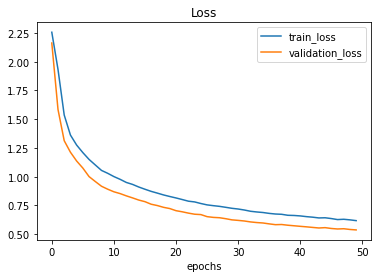

In [ ]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

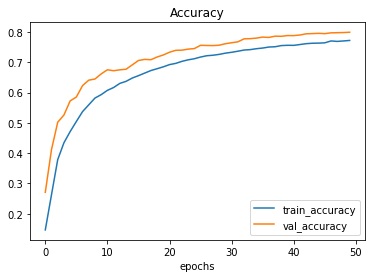

In [ ]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

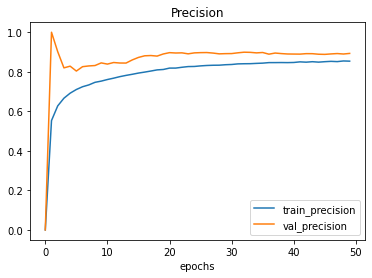

In [ ]:
plt.plot(history.history['precision_2'], label='train_precision')
plt.plot(history.history['val_precision_2'], label='val_precision')
plt.title('Precision')
plt.xlabel('epochs')
plt.legend()
plt.show()

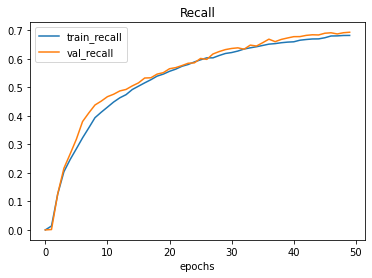

In [ ]:
plt.plot(history.history['recall_2'], label='train_recall')
plt.plot(history.history['val_recall_2'], label='val_recall')
plt.title('Recall')
plt.xlabel('epochs')
plt.legend()
plt.show()

313/313 [==============================] - 5s 15ms/step


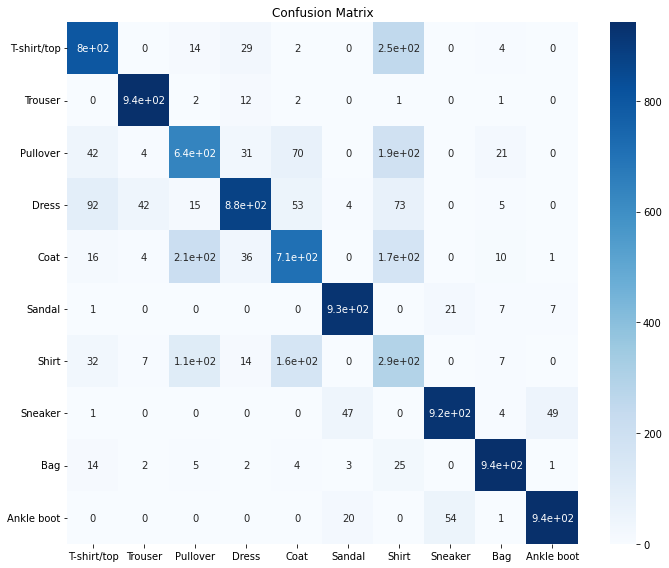

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
plt.figure(figsize=(10,8))
conf_mat = confusion_matrix(y_pred.tolist(), y_test.tolist())
sns.heatmap(conf_mat, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.73      0.80      0.76      1000
     Trouser       0.98      0.94      0.96      1000
    Pullover       0.64      0.64      0.64      1000
       Dress       0.76      0.88      0.81      1000
        Coat       0.61      0.71      0.66      1000
      Sandal       0.96      0.93      0.94      1000
       Shirt       0.47      0.29      0.36      1000
     Sneaker       0.90      0.93      0.91      1000
         Bag       0.94      0.94      0.94      1000
  Ankle boot       0.93      0.94      0.93      1000

    accuracy                           0.80     10000
   macro avg       0.79      0.80      0.79     10000
weighted avg       0.79      0.80      0.79     10000

